### Single Layer Perceptron

In [3]:
import tensorflow as tf

pytorch,tensorflow are deep learning frameworks

Hand written digits recognition using deep learning

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
from tensorflow import keras

In [6]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [7]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,sep='\n')

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
x_train[0].shape

(28, 28)

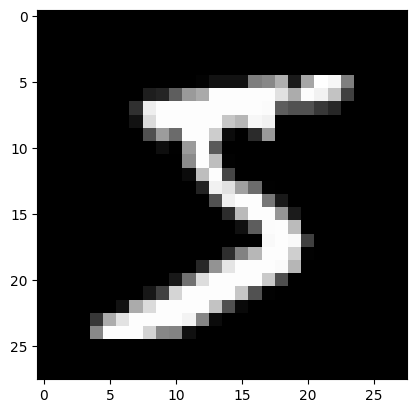

In [9]:
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [10]:
y_train[0]

5

In [12]:
len(x_train)
## represents no.of images in the training data set

60000

In [16]:
print(x_train[0].shape,type(x_train[0].shape),sep='\n')

(28, 28)
<class 'tuple'>


In [22]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [23]:
print(x_train_flatten.shape,x_test_flatten.shape,sep='\n')

(60000, 784)
(10000, 784)


training the model without data scaling or data normalisation

In [ ]:
model=keras.Sequential() ##created a sequential model
## it has 784 values as input.
## every neuron in the next layer has 784 input values. so while describing the first layer(non input layer) we 
## need to specify the input_shape parameter

In [38]:
model = keras.Sequential([ 
	keras.layers.Dense(10, input_shape=(784,), 
					activation='sigmoid') 
]) 
model.compile( 
	optimizer='adam', 
	loss='sparse_categorical_crossentropy', 
	metrics=['accuracy']) 

model.fit(x_train_flatten, y_train, epochs=5) 


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.5506 - accuracy: 0.8409
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0246 - accuracy: 0.8777
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6880 - accuracy: 0.8844
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4387 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2814 - accuracy: 0.8867


In [41]:
y_pred=model.predict(x_test_flatten)

313/313 [==============================] - 1s 2ms/step


In [39]:
model.evaluate(x_test_flatten, y_test) 

313/313 [==============================] - 1s 2ms/step - loss: 6.3622 - accuracy: 0.8777


[6.362209796905518, 0.8776999711990356]

In [45]:
y_test[0]

7

In [44]:
y_pred[0]

array([3.0437283e-22, 0.0000000e+00, 4.3716928e-24, 1.0000000e+00,
       0.0000000e+00, 3.8372341e-04, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [51]:
y_pred_val=np.argmax(y_pred,axis=1)

In [53]:
y_pred_val[0]

3

In [67]:
from sklearn.metrics import confusion_matrix

In [54]:
cm=confusion_matrix(y_test,y_pred_val)

In [60]:
print(cm)

[[ 979    0    1    0    0    0    0    0    0    0]
 [   7 1127    1    0    0    0    0    0    0    0]
 [ 265  337  425    3    1    1    0    0    0    0]
 [ 237  334  361   77    0    0    0    1    0    0]
 [ 123   46  146  228  433    0    1    0    5    0]
 [ 321   59  181  177   38  114    1    0    1    0]
 [ 273   83  578   14    3    5    2    0    0    0]
 [  72   58  245  566   26    5    0   56    0    0]
 [ 116  308  399   80   20   33    2    4   12    0]
 [  54   54   94  599  188    2    1   16    1    0]]


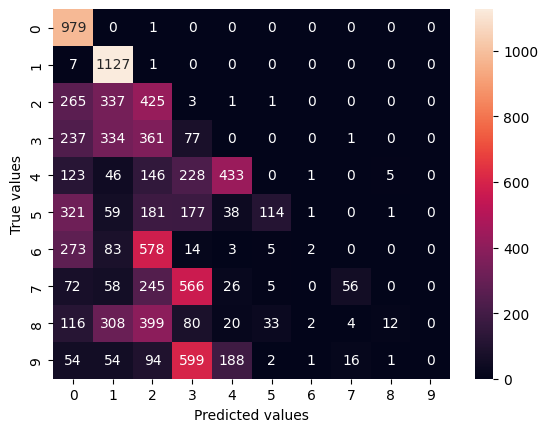

In [66]:
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

training the model with data normalisation

In [68]:
x_train_flatten=x_train_flatten/255
x_test_flatten=x_test_flatten/255

In [69]:
model.fit(x_train_flatten, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2904 - accuracy: 0.8254
Epoch 2/5
1875/1875 [==============================] - 2s 946us/step - loss: 0.8986 - accuracy: 0.8684
Epoch 3/5
1875/1875 [==============================] - 2s 993us/step - loss: 0.6182 - accuracy: 0.8849
Epoch 4/5
1875/1875 [==============================] - 2s 993us/step - loss: 0.4514 - accuracy: 0.8964
Epoch 5/5
1875/1875 [==============================] - 2s 990us/step - loss: 0.3601 - accuracy: 0.9068


In [70]:
y_pred1=model.predict(x_test_flatten)

313/313 [==============================] - 0s 813us/step


In [71]:
y_pred1_val=np.argmax(y_pred1,axis=1)

In [73]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 942us/step - loss: 0.3203 - accuracy: 0.9145


[0.3203085660934448, 0.9144999980926514]

In [74]:
cm=confusion_matrix(y_test,y_pred1_val)

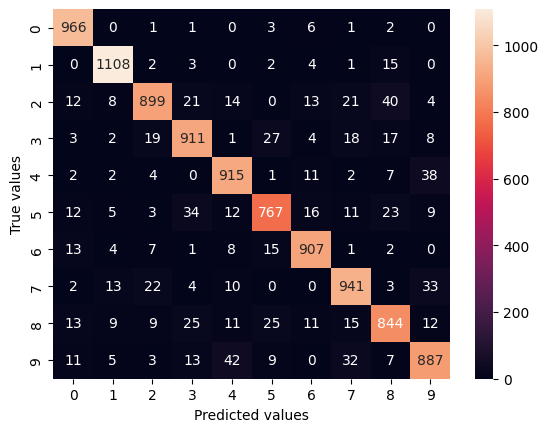

In [78]:
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()